# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

# Load data:

we are going to use **pycaret** module for Data Science Automation. Pycaret only supports upto python 3.10 version, but current version is 3.11. So, to avoid difficulties while running, so we have create a new environment with python 3.10.

We can confirm python version by "python --version" in command prompt.

In [40]:
!python --version

Python 3.10.13


In [41]:
#!pip install pycaret

**Installing all the required libraries using import command.**

Machine learning workflows can be automated with PyCaret, an open-source, low-code Python machine learning framework.

PyCaret's Classification Module is a supervised machine learning module that is used for classifying elements into groups.

In [42]:
import pandas as pd
from pycaret.classification import ClassificationExperiment 



We load the data using **pandas** module of python. Here, the data given is in csv file. so, we used read_csv function to load the data into the notebook.Pandas is python library which consists of functions and attributes used for data manipulation, data handling, numeric analysis and also data cleaning.

The loaded data can be viewed by calling variable given to loaded dataframe.

we are using the prepared churn data from the week-2.

In [43]:
df = pd.read_csv(r"C:\Users\santh\Downloads\prepared_churn_data.csv",index_col = 'customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
7590-VHVEG,1.0,0,0,3,29.85,29.85,0,29.850000
5575-GNVDE,34.0,1,1,2,56.95,1889.50,0,55.573529
3668-QPYBK,2.0,1,0,2,53.85,108.15,1,54.075000
7795-CFOCW,45.0,0,1,1,42.30,1840.75,0,40.905556
9237-HQITU,2.0,1,0,3,70.70,151.65,1,75.825000
...,...,...,...,...,...,...,...,...
6840-RESVB,24.0,1,1,2,84.80,1990.50,0,82.937500
2234-XADUH,72.0,1,1,0,103.20,7362.90,0,102.262500
4801-JZAZL,11.0,0,0,3,29.60,346.45,0,31.495455


In [44]:
df.sample(10)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
3806-YAZOV,3.0,1,0,2,18.80,56.00,0,18.666667
5680-LQOGP,68.0,1,2,0,82.45,5646.60,0,83.038235
5692-FPTAH,1.0,1,0,2,45.40,45.40,1,45.400000
7159-FVYPK,3.0,1,0,1,69.15,235.00,0,78.333333
8158-WPEZG,11.0,0,0,3,35.65,425.10,0,38.645455
4355-CVPVS,56.0,1,1,1,88.90,4968.00,0,88.714286
2433-KMEAS,22.0,1,0,3,54.45,1127.35,1,51.243182
6896-SRVYQ,44.0,1,0,3,73.85,3122.40,0,70.963636
5170-PTRKA,49.0,0,1,0,35.80,1782.00,0,36.367347


Using **df.info()**, we can verify that the loaded data is still in the correct format and has no missing values.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tenure             7043 non-null   float64
 1   PhoneService       7043 non-null   int64  
 2   Contract           7043 non-null   int64  
 3   PaymentMethod      7043 non-null   int64  
 4   MonthlyCharges     7043 non-null   float64
 5   TotalCharges       7043 non-null   float64
 6   Churn              7043 non-null   int64  
 7   charge_per_tenure  7043 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 495.2+ KB


# Creating automl using pycaret:

Using cross-validation, the ClassificationExperiment function trains and assesses the effectiveness of every estimator in the model library. This function provides a score grid with average cross-validated scores as its output. The get_metrics function can be used to get metrics that are examined during CV.

we create ds automation using ClassificationExperiment()

In [46]:
automl = ClassificationExperiment()

setup function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. It takes two required parameters: data and target. 

Here, data is our dataframe(df) and target is 'Churn'

In [47]:
automl.setup(df, target = 'Churn')

,Description,Value
0,Session id,5189
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 8)"
4,Transformed data shape,"(7043, 8)"
5,Transformed train set shape,"(4930, 8)"
6,Transformed test set shape,"(2113, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [48]:
automl

compare_models() allows to compare all the models and get the best model based on the evaluation metric given to it. By default, 'accuracy' is the default metric for comparision.

we also assign best model from the ds automation to best_model.

In [49]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7941,0.8374,0.5000,0.6466,0.5629,0.4312,0.4380,0.1950
lr,Logistic Regression,0.7937,0.8357,0.5290,0.6336,0.5752,0.4408,0.4447,0.8880
ridge,Ridge Classifier,0.7933,0.0000,0.4541,0.6619,0.5374,0.4105,0.4232,0.0110
ada,Ada Boost Classifier,0.7911,0.8353,0.4855,0.6408,0.5516,0.4190,0.4263,0.0700
lda,Linear Discriminant Analysis,0.7897,0.8237,0.5038,0.6311,0.5590,0.4234,0.4288,0.0120
lightgbm,Light Gradient Boosting Machine,0.7781,0.8209,0.4901,0.6023,0.5384,0.3948,0.3997,0.1320
rf,Random Forest Classifier,0.7661,0.7928,0.4580,0.5756,0.5085,0.3581,0.3630,0.1650
knn,K Neighbors Classifier,0.7625,0.7454,0.4389,0.5683,0.4936,0.3424,0.3480,0.0210
et,Extra Trees Classifier,0.7558,0.7749,0.4557,0.5501,0.4969,0.3379,0.3414,0.1280
qda,Quadratic Discriminant Analysis,0.7471,0.8183,0.7240,0.5183,0.6034,0.4255,0.4389,0.0140


In [50]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=5189, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

From all the above models, we got **Gradient Boosting Classifier(gbc)** is the best model with a accuracy of 79.41%. Logistic regression, Ridge classifier and Ada Boost classifier are the following better models with almost similar accuracy.

Evaluate_model function  gives all the possible evaluation metrics for the model.

In [79]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

plot_model function provides the different evalution plots for the model. By default, it produces **ROC** Curve . 

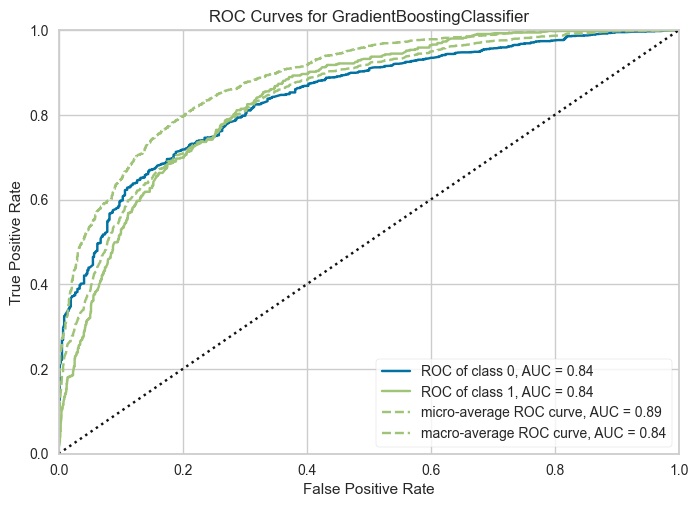

In [52]:
automl.plot_model(best_model)

The above plot shows the ROC curve of best_modl(gbc). In the plot, our model Area under curve value is 0.84, it shows model perfromance is considered as good.

# Saving the model:

Save_model function in pycaret saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [53]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges',
                                              'charge_per_tenure'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbos...
           

Here, we saved our model as 'pycaret_model'.

# Loading the model:

we can load the saved model by using load_model function of pycaret.The load model function loads a previously saved pipeline.

In [54]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


we use predict_model to predict the output of the new data .

In [55]:
new_pycaret.predict_model(loaded_model, df.iloc[-9:-1])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure,Churn,prediction_label,prediction_score
customerID,,,,,,,,,,
0639-TSIQW,67.0,1,0,0,102.949997,6886.250000,102.779854,1,0,0.6608
8456-QDAVC,19.0,1,0,1,78.699997,1495.099976,78.689476,0,0,0.6561
7750-EYXWZ,12.0,0,1,3,60.650002,743.299988,61.941666,0,0,0.7630
2569-WGERO,72.0,1,2,1,21.150000,1419.400024,19.713888,0,0,0.9867
6840-RESVB,24.0,1,1,2,84.800003,1990.500000,82.937500,0,0,0.8786
2234-XADUH,72.0,1,1,0,103.199997,7362.899902,102.262497,0,0,0.8865
4801-JZAZL,11.0,0,0,3,29.600000,346.450012,31.495455,0,0,0.7189
8361-LTMKD,4.0,1,0,2,74.400002,306.600006,76.650002,1,1,0.6208


we can observe , predict_model created two new columns i.e.,'prediction_label' and 'prediction_score'. prediction_label is the predicted output for the given data whereas the prediction_score is the probability of that predcited_label.

# Displaying python module and running with prepared_churn_data:

we can observe the created python module by using IPython.display in python.

In [71]:
from IPython.display import Code

Code('predict_Churn_pycaret.py')

import pandas as pd
from pycaret.classification import predict_model, load_model

def load_data(file_path):
    df = pd.read_csv(file_path, index_col = 'customerID')
    return df

def make_predictions(df):
    model = load_model('pycaret_model')
    predictions = predict_model(model, data= df)
    predictions.rename({'prediction_label':'predicted_churn'}, axis=1, inplace = True)
    predictions['predicted_churn'].replace({0:'No Churn', 1:'Churn'}, inplace = True)
    return predictions['predicted_churn']
def probabilities(df):
    model = load_model('pycaret_model')
    predictions = predict_model(model,data=df)
    return predictions['prediction_score']

def predict_true(df):
    model = load_model('pycaret_model')
    predictions = predict_model(model, data= df)
    return predictions['prediction_label']


if __name__=='__main__':
    file_name = input("Give a file name:")
    df = load_data(file_name)
    print()
    print("predictions")
    print(f'output: {make_predictions(df)}')
    print()
    print("Probabilities")
    print(f'probability: {probabilities(df)}')
    print()
    print("True_values")
    print(predict_true(df))

From the above code, we can explain that our created python module **(predict_Churn_pycaret)** has load_data, make_predictions, probabilities and predict_true functions. Our module also able to load the model using 'load_model' and predict Churn using 'predict_model' of pycaret.

load_data(filename) is used to load the data using pandas module.

make_predictions(df) is used to make predictions of customer churn using loaded model for the dataframe df.

probabilities(df) allows us to find the probabilities of churn for the data df.

true_values(df) allows us to find the prediction of churn in numerical labels for the data df.





We can test our python module running the file with the Jupyter "magic" command %run.

our python module will ask for a **filename** as input to predict the churn , finding probabilities and true_labels for the data. 

In [73]:
%run predict_Churn_pycaret.py

Give a file name: prepared_churn_data.csv



predictions
Transformation Pipeline and Model Successfully Loaded
output: customerID
7590-VHVEG       Churn
5575-GNVDE    No Churn
3668-QPYBK    No Churn
7795-CFOCW    No Churn
9237-HQITU       Churn
                ...   
6840-RESVB    No Churn
2234-XADUH    No Churn
4801-JZAZL    No Churn
8361-LTMKD       Churn
3186-AJIEK    No Churn
Name: predicted_churn, Length: 7043, dtype: object

Probabilities
Transformation Pipeline and Model Successfully Loaded
probability: customerID
7590-VHVEG    0.5559
5575-GNVDE    0.9347
3668-QPYBK    0.5679
7795-CFOCW    0.9220
9237-HQITU    0.5758
               ...  
6840-RESVB    0.8786
2234-XADUH    0.8865
4801-JZAZL    0.7189
8361-LTMKD    0.6208
3186-AJIEK    0.9292
Name: prediction_score, Length: 7043, dtype: float64

True_values
Transformation Pipeline and Model Successfully Loaded
customerID
7590-VHVEG    1
5575-GNVDE    0
3668-QPYBK    0
7795-CFOCW    0
9237-HQITU    1
             ..
6840-RESVB    0
2234-XADUH    0
4801-JZAZL    0
8361-LTMKD 

# Finding predictions for "new_churn_data.csv":

To find the predicions for the new_churn_data using our created model, First we should import our predict_Churn_pycartet module then we are able to use the functions of the predict_Churn_pycaret module. 

In [74]:
import predict_Churn_pycaret as pych
# loading the dataframe "new_churn_data.csv"
new_churn_data = pych.load_data(r"C:\Users\santh\Downloads\new_churn_data.csv")
new_churn_data

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure
customerID,,,,,,,
9305-CKSKC,22,1,0,2,97.40,811.70,36.895455
1452-KNGVK,8,0,1,1,77.30,1701.95,212.743750
6723-OKKJM,28,1,0,0,28.25,250.90,8.960714
7832-POPKP,62,1,0,2,101.70,3106.56,50.105806
6348-TACGU,10,0,0,1,51.15,3440.97,344.097000


In [75]:
pych.make_predictions(new_churn_data)

Transformation Pipeline and Model Successfully Loaded


customerID
9305-CKSKC       Churn
1452-KNGVK    No Churn
6723-OKKJM    No Churn
7832-POPKP    No Churn
6348-TACGU    No Churn
Name: predicted_churn, dtype: object

In [76]:
pych.probabilities(new_churn_data)

Transformation Pipeline and Model Successfully Loaded


customerID
9305-CKSKC    0.5663
1452-KNGVK    0.8870
6723-OKKJM    0.8259
7832-POPKP    0.7775
6348-TACGU    0.7076
Name: prediction_score, dtype: float64

In [77]:
pych.predict_true(new_churn_data)

Transformation Pipeline and Model Successfully Loaded


customerID
9305-CKSKC    1
1452-KNGVK    0
6723-OKKJM    0
7832-POPKP    0
6348-TACGU    0
Name: prediction_label, dtype: int32

our model has predicted true values as [1,0,0,0,0] but actual true values for the model are [1,0,0,1,0] . Here, we can observe that our model predicted almost 4 out of 5 are correct, it is around 80% accuracy, which is almost equal to our model accuracy. so, we can consider that our model as a better model. 

# Testing python module with new data:

We can test our python module running the file with the Jupyter "magic" command %run.

our python module will ask for a **filename** as input to predict the churn , finding probabilities and true_labels for the data. 

In this case our file name is **"new_churn_data.csv".**

In [80]:
%run predict_Churn_pycaret.py


Give a file name: new_churn_data.csv



predictions
Transformation Pipeline and Model Successfully Loaded
output: customerID
9305-CKSKC       Churn
1452-KNGVK    No Churn
6723-OKKJM    No Churn
7832-POPKP    No Churn
6348-TACGU    No Churn
Name: predicted_churn, dtype: object

Probabilities
Transformation Pipeline and Model Successfully Loaded
probability: customerID
9305-CKSKC    0.5663
1452-KNGVK    0.8870
6723-OKKJM    0.8259
7832-POPKP    0.7775
6348-TACGU    0.7076
Name: prediction_score, dtype: float64

True_values
Transformation Pipeline and Model Successfully Loaded
customerID
9305-CKSKC    1
1452-KNGVK    0
6723-OKKJM    0
7832-POPKP    0
6348-TACGU    0
Name: prediction_label, dtype: int32


<Figure size 800x550 with 0 Axes>

# Summary

Write a short summary of the process and results here.

The main aim of the project is create DS Automation and upload them in GitHUb repository. we  used **pycaret** module for Data Science Automation. Pycaret only supports upto python 3.10 version, but our current version is 3.11. So, to avoid difficulties while running, so we have created a new environment with python 3.10. Next, we created a new automation model "automl" using pycaret. We  used setup to create a pipeline and differentiate the target from the data. The compare_model of pycaret allows to get the best_model from the automation. We got Gradient Boosting Classifier(gbc) as our best model, by considering "accuracy" as parameter, with a accuracy  of **79.41%**. Then, we evaluated model and plotted the ROC curve for the best_model. Here, we got AUC of 84%. Later, we saved our model as **pycaret_model** and loaded to test for last rows of dataframe.

we  created a python module **(predict_Churn_pycaret)** which has load_data, make_predictions, probabilities and predict_true functions. Our module also able to load the pycaret_model using 'load_model' and predict Churn using 'predict_model' of pycaret.We tested  our python module running the prepared_churn_data  with the Jupyter "magic" command %run.It gives the output of whether customer is likely to churn or not, and thier churn probabilities and true labels. In order to utilize our developed model to determine the predictions for the new_churn_data, we must  imported  our predict_Churn_pycartet module as pych before using its functions.our model has predicted true values as [1,0,0,0,0] but actual true values for the model are [1,0,0,1,0] . Here, we can observe that our model predicted almost 4 out of 5 are correct, it is around 80% accuracy, which is almost equal to our model accuracy. so, we can consider that our model as a better model. Finally, we have uploaded our entire code into GitHub **MSDMS600-week-5-Assignment**.
